# День 02 – Предиктивный анализ I

Построить свою первую модель машинного обучения (логистическая регрессия).

Предварительно предобработав данные правильным образом.


## 0. Импорт библиотек

К знакомым библиотекам в этом блоке появляется библиотека **seaborn**, которая позволяет строить более красивые и сложные визуализации. Они нам потребуются.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style("darkgrid") #у графиков будет красивая серая подложка

## 1. Загрузка данных

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/School21/day02/bank_data_train_d02.csv')
df.head()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
0,146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
1,146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
2,146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
3,146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
4,146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


целевой признак **TAGET** — фактический индикатор оттока — категориальный признак => задача будет достигаться методами классификации

## 2. Предобработка данных

2.1 Проверка качества данных

In [5]:
# размер датасета

df.shape

(355190, 105)

In [6]:
df.info(verbose=True, null_counts=bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Data columns (total 105 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    ID                                355190 non-null  int64  
 1    CR_PROD_CNT_IL                    355190 non-null  int64  
 2    AMOUNT_RUB_CLO_PRC                355190 non-null  float64
 3    APP_REGISTR_RGN_CODE              355190 non-null  object 
 4    TURNOVER_DYNAMIC_IL_1M            355190 non-null  float64
 5    LDEAL_YQZ_COM_GROUP               355190 non-null  object 
 6    LDEAL_YQZ_CHRG_GROUP              355190 non-null  object 
 7    AVG_PCT_MONTH_TO_PCLOSE_GROUP     355190 non-null  object 
 8    MAX_PCLOSE_DATE_GROUP             355190 non-null  object 
 9    AVG_PCT_DEBT_TO_DEAL_AMT_GROUP    355190 non-null  object 
 10   LDEAL_AMT_MONTH_GROUP             355190 non-null  object 
 11   LDEAL_YQZ_PC_GROUP                355

Датасет содержить 355190 строк и 105 столбцов, *явных пропусков не обнаружено*


In [7]:
# проверка на дубликаты
df.duplicated().sum()

0

In [8]:
df['ID'].value_counts().sum()

355190

Дубликатов в данных не обнаружено.

2.1 Подготовка данных для машинного обучения

Требуемые изменения (п.2 задания):
- **Удалить признак CLNT_JOB_POSITION**
- **Столбец ID сделать индексом, для получившегося датасета**

In [9]:
col_drop = ['CLNT_JOB_POSITION']
df_drop = df.drop(col_drop, axis=1).set_index('ID')
df_drop.head()

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,APP_REGISTR_RGN_CODE,TURNOVER_DYNAMIC_IL_1M,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0,0
146842,0,0.041033,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0,0
146843,0,0.006915,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0,0
146844,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0,0
146845,0,0.000000,неизвестна,0.0,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0,0


In [10]:
df_drop.shape

(355190, 103)

In [11]:
# TARGET - будет иметь только конечное кол-во значений [0,1] и считать его непрерывным неправильно (удалаем из выборки)
# Делим датасет. Выделяем датасет с непрерывными признакми (количественные)

df_quanti = df_drop.select_dtypes(include=['int64', 'float64']).drop('TARGET', axis=1)
df_quanti

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0.000000,0.0,0.000000,0.0,0.541683,0,156067.339767,0.000000,0.000000,...,0.442285,1.593023,0.0,0.0,0.483032,0.406780,0.0,0.0,0.0,0.0
146842,0,0.041033,0.0,0.244678,0.0,0.000000,0,4278.845817,0.000000,0.454545,...,0.515876,1.587647,0.0,0.0,0.394340,0.545455,0.0,0.0,0.0,0.0
146843,0,0.006915,0.0,0.000000,0.0,0.000000,0,112837.062817,0.000000,0.000000,...,0.522833,1.587647,0.0,0.0,0.399342,0.297297,0.0,0.0,0.0,0.0
146844,0,0.000000,0.0,0.000000,0.0,0.005874,0,42902.902883,0.000000,0.000000,...,0.000189,1.583333,0.0,0.0,0.552169,0.558824,0.0,0.0,0.0,0.0
146845,0,0.000000,0.0,0.000000,0.0,0.000000,0,71906.476533,0.000000,0.000000,...,0.593648,1.583333,0.0,0.0,0.611610,0.620690,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590822,0,0.000000,0.0,0.000000,0.0,0.000000,0,9697.620867,0.000000,0.000000,...,0.572322,8.963872,0.0,0.0,0.659039,0.785714,0.0,0.0,0.0,0.0
590823,0,0.000000,0.0,0.000000,0.0,0.000000,0,428380.024733,0.262714,0.000000,...,0.392381,8.963872,0.0,0.0,0.652612,0.500000,0.0,0.0,0.0,0.0
590825,0,0.041298,0.0,0.095187,0.0,0.000000,0,224884.436700,0.031179,0.211488,...,0.447377,8.966560,0.0,0.0,0.448386,0.459530,0.0,0.0,0.0,0.0


Проведем **стандартизацию** непрерывных признаков (непрерывные величины могут принимать любое значение в числовом интервале - int, float)

In [12]:
# импортируем библиотеку для стандартного масштабирования
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
df_standartd = df_quanti.copy()
df_standartd[:] = scaler.fit_transform(df_quanti)
df_standartd

,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,TURNOVER_DYNAMIC_IL_1M,AMOUNT_RUB_SUP_PRC,REST_DYNAMIC_FDEP_1M,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,AMOUNT_RUB_NAS_PRC,TRANS_COUNT_SUP_PRC,...,TURNOVER_DYNAMIC_CUR_3M,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M
ID,,,,,,,,,,,,,,,,,,,,,
146841,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,2.356500,-0.169589,0.477531,-0.248485,-1.004598,...,-0.128283,-0.948052,-0.347604,-0.240313,-0.363365,-0.808123,-0.083103,-0.032303,-0.109613,-0.071988
146842,-0.243932,0.016835,-0.044824,1.221828,-0.05133,-0.312371,-0.169589,-0.330458,-0.248485,1.446347,...,0.093638,-0.949882,-0.347604,-0.240313,-0.703305,-0.201842,-0.083103,-0.032303,-0.109613,-0.071988
146843,-0.243932,-0.313313,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.247411,-0.248485,-1.004598,...,0.114617,-0.949882,-0.347604,-0.240313,-0.684133,-1.286775,-0.083103,-0.032303,-0.109613,-0.071988
146844,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.283428,-0.169589,-0.124857,-0.248485,-1.004598,...,-1.461483,-0.951351,-0.347604,-0.240313,-0.098373,-0.143394,-0.083103,-0.032303,-0.109613,-0.071988
146845,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,0.029532,-0.248485,-1.004598,...,0.328171,-0.951351,-0.347604,-0.240313,0.129454,0.127082,-0.083103,-0.032303,-0.109613,-0.071988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590822,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,-0.301613,-0.248485,-1.004598,...,0.263860,1.562006,-0.347604,-0.240313,0.311241,0.848562,-0.083103,-0.032303,-0.109613,-0.071988
590823,-0.243932,-0.380232,-0.044824,-0.582347,-0.05133,-0.312371,-0.169589,1.927086,2.804227,-1.004598,...,-0.278776,1.562006,-0.347604,-0.240313,0.286606,-0.400568,-0.083103,-0.032303,-0.109613,-0.071988
590825,-0.243932,0.019401,-0.044824,0.119528,-0.05133,-0.312371,-0.169589,0.843853,0.113815,0.135764,...,-0.112929,1.562922,-0.347604,-0.240313,-0.496155,-0.577500,-0.083103,-0.032303,-0.109613,-0.071988


Как видно, признаки находятся примерно в одной какой-то шкале. Лог. регрессии будет проще подобрать коэффициенты, которые при этом будут тоже примерно находится в одной размерности

In [14]:
# Делим датасет. Выделяем датасет с категориальными признаками

df_quality = df_drop.select_dtypes(include=['object'])
df_quality

,APP_REGISTR_RGN_CODE,LDEAL_YQZ_COM_GROUP,LDEAL_YQZ_CHRG_GROUP,AVG_PCT_MONTH_TO_PCLOSE_GROUP,MAX_PCLOSE_DATE_GROUP,AVG_PCT_DEBT_TO_DEAL_AMT_GROUP,LDEAL_AMT_MONTH_GROUP,LDEAL_YQZ_PC_GROUP,LDEAL_DELINQ_PER_MAXYQZ_GROUP,MED_DEBT_PRC_YQZ_GROUP,...,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,PACK
ID,,,,,,,,,,,,,,,,,,,,,
146841,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,k01
146842,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,102
146843,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,102
146844,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,k01
146845,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590822,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,104
590823,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,104
590825,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,...,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,неизвестна,k01


Сделать **one-hot encoding** для категориальных признаков.

Под категориальными данными мы понимаем данные, которые **не имеют численного представления**, они могут иметь как и два уникальных значения (бинарные признаки), так и более.

In [15]:
df_quality = pd.get_dummies(df_quality)
df_quality

,APP_REGISTR_RGN_CODE_1,APP_REGISTR_RGN_CODE_10,APP_REGISTR_RGN_CODE_11,APP_REGISTR_RGN_CODE_12,APP_REGISTR_RGN_CODE_13,APP_REGISTR_RGN_CODE_14,APP_REGISTR_RGN_CODE_15,APP_REGISTR_RGN_CODE_16,APP_REGISTR_RGN_CODE_17,APP_REGISTR_RGN_CODE_18,...,PACK_103,PACK_104,PACK_105,PACK_107,PACK_108,PACK_109,PACK_301,PACK_k01,PACK_m01,PACK_o01
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
146842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
146844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
146845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590822,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
590823,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
590825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Соединяем датасеты в один, для дальнейшей работы с ним (в машинном обучении)

df_ml = df_quality.merge(df_standartd, left_on='ID', right_on='ID').merge(df_drop.TARGET, left_on='ID', right_on='ID')
df_ml.head()

,APP_REGISTR_RGN_CODE_1,APP_REGISTR_RGN_CODE_10,APP_REGISTR_RGN_CODE_11,APP_REGISTR_RGN_CODE_12,APP_REGISTR_RGN_CODE_13,APP_REGISTR_RGN_CODE_14,APP_REGISTR_RGN_CODE_15,APP_REGISTR_RGN_CODE_16,APP_REGISTR_RGN_CODE_17,APP_REGISTR_RGN_CODE_18,...,CLNT_SETUP_TENOR,TURNOVER_DYNAMIC_PAYM_3M,TURNOVER_DYNAMIC_PAYM_1M,TRANS_AMOUNT_TENDENCY3M,TRANS_CNT_TENDENCY3M,REST_DYNAMIC_CC_1M,TURNOVER_DYNAMIC_CC_1M,REST_DYNAMIC_CC_3M,TURNOVER_DYNAMIC_CC_3M,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
146841,0,0,0,0,0,0,0,0,0,0,...,-0.948052,-0.347604,-0.240313,-0.363365,-0.808123,-0.083103,-0.032303,-0.109613,-0.071988,0
146842,0,0,0,0,0,0,0,0,0,0,...,-0.949882,-0.347604,-0.240313,-0.703305,-0.201842,-0.083103,-0.032303,-0.109613,-0.071988,0
146843,0,0,0,0,0,0,0,0,0,0,...,-0.949882,-0.347604,-0.240313,-0.684133,-1.286775,-0.083103,-0.032303,-0.109613,-0.071988,0
146844,0,0,0,0,0,0,0,0,0,0,...,-0.951351,-0.347604,-0.240313,-0.098373,-0.143394,-0.083103,-0.032303,-0.109613,-0.071988,0
146845,0,0,0,0,0,0,0,0,0,0,...,-0.951351,-0.347604,-0.240313,0.129454,0.127082,-0.083103,-0.032303,-0.109613,-0.071988,0


In [17]:
df_ml.shape

(355190, 371)

2.2 Формирование выборок: обучающая, тестовая

Процент тестовой выборки: 20%. Использовать параметр **random_state=21** (п.6 задания)

**Разбить датасет** на train и test.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_ml.drop('TARGET', axis=1), df_ml.TARGET,
                                                    test_size=0.2, random_state=21)

In [20]:
print('Признаки обучающей выборки:',X_train.shape, y_train.shape,
      'Тестовая выборка', X_test.shape, y_test.shape)

Признаки обучающей выборки: (284152, 370) (284152,) Тестовая выборка (71038, 370) (71038,)


# 3. Исследование

Обучить логистическую регрессию с параметрами: solver='liblinear', fit_intercept=False, penalty='l1', random_state=21 (п.7 задания)

In [21]:
# импорт библиотеки для Логистической регрессии
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(solver='liblinear', fit_intercept=False, penalty='l1', random_state=21).fit(X_train, y_train)

Померием **качество модели** в числовом виде Есть метрика **accuracy**, которая показывает % случаев, в которых модель верно угадала класс, по отношению к общему количеству наблюдений.
 - Посчитать accuracy модели на тестовой выборке, сравнить предсказанные значения с реальными (п.8 задания)

In [23]:
clf.score(X_test, y_test) * 100

91.97331005940482

- Посчитать процент клиентов в тестовой выборке, у которых индекс оттока рвен 0 и сравнить с accuracy (п.9 задания)


In [24]:
sum(y_test == 0) / y_test.size * 100

91.96064078380584

- Простроить график, на котором видны топ-10 самых важных факторов по мнению модели в абсолютном значении (п.10 задания)

In [25]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize=(12,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

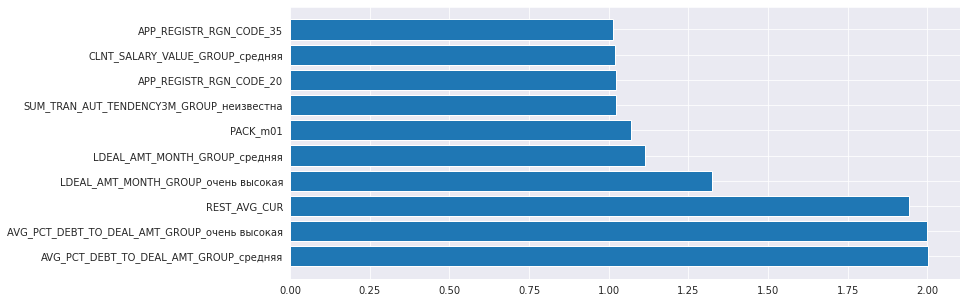

In [26]:
f_importances(abs(clf.coef_[0]), X_train.columns, top=10)